# Thinking 1 :奇异值分解SVD的原理是怎样的，都有哪些应用场景

答：  
## 原理：  
一、对称方阵矩阵的分解：
>对于对称方阵 $A$ 可以分解为：$A = VDV^T$ 的形式，  
若不是矩阵 $A_{n,m}$ 不是对称方阵，可以将 $A_{n,m}$ 转换为 $AA^T_{n,n}$ 进行矩阵分解。  

二、$AA^T$ 与 $A^TA$ 的特征值是相同的（$A_{m,n}$ ）:  
> 若 $A^TA$ 存在特征值、特征向量 $\lambda, v_i$ 则$$A^TA \cdot v_i = \lambda \cdot v_i$$ $$AA^T(Av_i) = A\lambda v_i$$ $$AA^T\cdot u_i = \lambda (u_i)$$所以两者有着相同的特征值$$A^TA_{n,n} = V_{n,n}DV^T, AA^T_{m,m} = U_{m,m}BU^T$$ $D,B$ 中的特征值是相同的

三、非方阵的矩阵分解：  
>若 $A^TA$ 存在特征值、特征向量 $\lambda, v_i$ 则$$A^TA \cdot v_i = \lambda \cdot v_i$$
相应的$u_i = Av_i$也是特征值 $\lambda$ 的特征向量。  
对 $u_i$ 进行标准化可以得到：$$ w_i = \frac{Av_i}{|Av_i|} = \frac{Av_i}{\sqrt{\lambda}}$$ $$Av_i = \sqrt{\lambda}\cdot w_i$$
$$ AV = W\Sigma $$ $$A = W\Sigma V^T$$

四、特性：
> 1. SVD中的奇异值 $\Sigma$ 为$D$ 的特征值开方；  
2. 右奇异值向量为$A^TA$ 的特征向量；  
3. 左奇异值向量为 $Av_i$的标准化向量。
4. $W_{m,m}$  $V_{n,n}$ 分别代表 $A$ 中的行特征矩阵与列特征矩阵，即：$User$ 矩阵与 $Item$ 矩阵  
参考：https://zhuanlan.zhihu.com/p/110805571

## 应用:
SVD 可以对非稀疏矩阵，进行特征提取，以达到降维的效果  
如下两个应用：  
1. 图片的压缩；
2. 在推荐系统中，用户矩阵与商品矩阵的构造，降维后，以使用更少的特征得到完整矩阵近似的解。
 

# Thinking 2 : funkSVD, BiasSVD，SVD++算法之间的区别是怎样的

答：  
>+ 由于 SVD 方法不能解决稀疏矩阵的问题，因此使用机器学习方法，在 SVD 降维的基础上(设置超参数 构造特征数量： $k$)。  
>+ 只关注有值部分，构造损失函数，使用梯度下降的优化方式，得到最小Loss的两个矩阵，以达到矩阵分解的效果。  
>+ 三者的区别在于损失函数的构造方式不同。
1. FunkSvd： $$\underset{p_i, q_j}{argmin}\sum_{i,j\in K}(m_ij - q_j^Tp_i)^2 + \lambda (||p_i||_2^2+||q_j||_2^2)$$
2. BiasSVD: 通过 baseline 的方式设置损失函数：
$$\underset{p_i, q_j}{argmin}\sum_{i,j\in K}(m_ij - \mu - b_u - b_i - q_j^Tp_i)^2 + \lambda (||p_i||_2^2+||q_j||_2^2+||b_u||_2^2+||qb_i||_2^2)$$
3. SVD ++ 加入了用户的隐式行为：
$$\underset{p_i, q_j}{argmin}\sum_{i,j\in K}(m_ij - \mu - b_u - b_i - q_j^T(p_i + |I_i|^{-\frac{1}{2}} + \sum_{j\in{I_i}}y_j))^2 + \lambda (||p_i||_2^2+||q_j||_2^2+||b_u||_2^2+||b_i||_2^2+||\sum_{j\in{I_i}}y_j||_2^2)$$

# Thinking 3 : 矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足

答：  
1. 可解释性差，这个是由隐因子算法的特点决定的；  
2. 利用内积来拟合用户的兴趣，有些非线性特征不是内积可以完全拟合的，这就有FM算法了及google的深度学习推荐算法的推广等非线性的推广；  
3. 只用到了用户行为特征，用户及节目的特征没有很好的整合进来。学习过程中很难融合更多有用的特征，比如用户的人口统计学信息，长期的类目、品牌和商家的偏好；以及商品的基础特征信息，如类目、品牌等。因而，基础矩阵分解的泛化能力受到一定的限制。  
4. 只是用了用户的行为特征，不能解决冷启动问题。  
5. 很难增量在线计算，从而不能处理用户的实时行为反馈，只能基于历史行为来计算。  

# Thinking 4 : 假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的

答：  
1. 首先将小说网站的所有小说的摘要，提取关键词
2. 将每一篇小说的摘要关键词转化为可以量化的词向量（一元语法、多元语法的TF-IDF；word2vec（固定的维度））
3. 计算小说之间的摘要词向量相似度
4. 基于用户所看小说与其他小说的相似度大小，进行推荐。

# Thinking 5 : Word2Vec的应用场景有哪些

答：  
## word2vec：
>是一个单词 embedding 的一个方法，通过拟合神经网络隐藏层，将 onehot 编码的数据转换为一个固定维度的词向量。

## word2vec embedding矩阵得到的方式：
>第一种、将上下文单词作为输入，预测这个单词是哪一个的可能性，最小化 loss （可能性的差值和），进行神经网络后向传播，前向传播，最后得到embedding矩阵；
第二种、将单词作为输入，预测上下文单词出现的可能性，最小化 loss，得到 embedding 词向量矩阵

## 应用场景：
> word2vec 的作用是将 onehot 编码转化为固定的维度的向量，并以此对 onehot 中每一个单词间的距离进行测算；
不仅如此，对于所有序列模型，都可以将其中某一个作为一个单词。
1. 文本：可以用于对单词的相似度分析、聚类、分类等。
2. 点击率顺序：对每一个点击的页面，进行向量化，衡量每个页面间的关联、相似程度，进行推荐。
3. 商品推荐：将用户的购买行为看作一个文本，每一个商品看作一个单词，以此计算每个商品的关联、相似程度，进行推荐。
4. 社交网络：将用户联系人物的顺序作为一个文本，每一个人物看作词向量，以此计算每个人物间的关联、相似程度，进行推荐。

资料：  
https://blog.csdn.net/yu5064/article/details/79601683  
https://blog.csdn.net/zxm1306192988/article/details/78697740  
https://www.zhihu.com/question/25269336  
https://blog.csdn.net/mytestmy/article/details/38612907  

# Action 1 : 选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

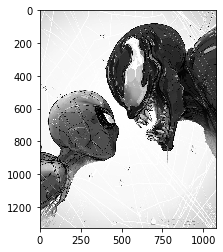

图像特征值数量: 1080 

特征值数量为 1% 时,图像为: 



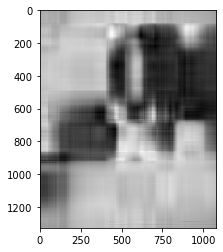

特征值数量为 5% 时,图像为: 



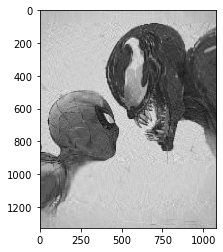

特征值数量为 50% 时,图像为: 



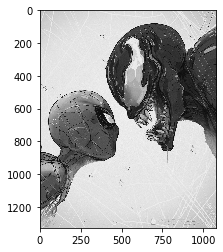

In [14]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    #print(A-temp)


# 加载256色图片
image = Image.open('./0.jpg') 

#将照片转化为灰度图片
img = np.array(image.convert('L'), 'f') #读取图片，灰度化，转换为数组，L = 0.299R + 0.587G + 0.114B。'f'为float类型

A = np.array(img)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
print('图像特征值数量:', len(s),'\n')
# 取前k个特征，对图像进行还原
print('特征值数量为 1% 时,图像为:','\n')
get_image_feature(s, 5)
print('特征值数量为 5% 时,图像为:','\n')
get_image_feature(s, 50)
print('特征值数量为 50% 时,图像为:','\n')
get_image_feature(s, 500)

# Action 2 : 使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）

Google Colab 使用：  
https://www.cnblogs.com/lfri/p/10471852.html

## 准备工作:
### 1. 上传Google云盘 movielens 数据集
### 2. 使用Google colab

```python

#安装必要的库和包
from google.colab import drive
drive.mount('/content/drive')

#进入安装环境
!ls "/content/drive/My Drive/"

#安装 surprise 包
!pip install surprise
```

### 3. 使用GPU加速
#### 数据读取：

```python
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import time


# from google.colab import drive
# drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

time1=time.time()

# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
train_set = data.build_full_trainset()
```


#### (1) 使用Funk SVD方法：
```python
time1=time.time()

# 使用funkSVD
algo = SVD(biased=False)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)
```
>#### 输出结果：

>RMSE: 0.8724  
RMSE: 0.8737  
RMSE: 0.8722  
user: 196        item: 302        r_ui = 4.00   est = 4.57   {'was_impossible': False}  
145.8252305984497  

#### (2) 使用biased SVD：
```python
time1=time.time()
# 使用 Biased SVD
algo = SVD(biased = True)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)

```
>#### 输出结果：

>RMSE: 0.8465  
RMSE: 0.8432  
RMSE: 0.8462  
user: 196        item: 302        r_ui = 4.00   est = 3.97   {'was_impossible': False}  
141.18379878997803

#### (3) 使用 SVD++ ：
```python
from surprise import SVDpp

time1=time.time()
# 使用 Biased SVD
algo = SVDpp(n_factors = 5)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)

```
>#### 输出结果：

>RMSE: 0.8308  
RMSE: 0.8293  
RMSE: 0.8309  
user: 196        item: 302        r_ui = 4.00   est = 3.90   {'was_impossible': False}  
4811.0583329200745  

#### SVD++ 算法原理：
https://www.cnblogs.com/Xnice/p/4522671.html
#### 主要注意：隐式反馈矩阵是自动生成的

# Action 3 : 使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?
>数据集：three_kingdoms.txt

In [46]:
# -*-coding: utf-8 -*-
# 对txt文件进行中文分词
import jieba
import os
from utils import files_processing

# 源文件所在目录
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list, segment_out_dir, stopwords = []):
    for i, file in enumerate(file_list):
        segment_out_name = os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment = []
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中
file_list = files_processing.get_files_list(source_folder, postfix = '*.txt')
segment_lines(file_list, segment_folder)

In [53]:
# -*-coding: utf-8 -*-
# 先运行 word_seg进行中文分词，然后再进行word_similarity计算
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = './three_kingdoms/segment/segment_0.txt'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
print(model.wv.similarity('曹操', '刘备'))
print(model.wv.similarity('曹操', '曹孟德'))
print(model.wv.most_similar(positive=['曹操', '刘备'], negative=['诸葛亮']))
# 设置模型参数，进行训练
model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=2, workers=multiprocessing.cpu_count())
# 保存模型
model2.save('./models/word2Vec.model')
print(model2.wv.similarity('曹操', '刘备'))
print(model2.wv.similarity('曹操', '曹孟德'))
print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['诸葛亮']))

0.9747976
0.95360917
[('云长', 0.9862131476402283), ('孔明', 0.9857115149497986), ('关公', 0.9853926301002502), ('故主', 0.9801314473152161), ('大怒', 0.9795747995376587), ('帝', 0.9795483350753784), ('众将', 0.9793025255203247), ('左右', 0.9790314435958862), ('进', 0.9789614677429199), ('请罪', 0.9783164262771606)]
0.92904055
0.9567961
[('云长', 0.988024115562439), ('云', 0.9858871698379517), ('万无一失', 0.9850296974182129), ('说', 0.9848043918609619), ('毕', 0.9836692810058594), ('大怒', 0.9836548566818237), ('关公', 0.983600378036499), ('左右', 0.983497142791748), ('孙氏厚', 0.983430027961731), ('玄德问', 0.9833120703697205)]


In [40]:
import os
os.getcwd()
os.chdir(r"c:\Users\10109\Documents\Jupyter notebook\人工智能课程(BI方向)\BI名企实训\第 4 章SVD矩阵分解与基于内容的推荐\L4-code\L4\word2vec")
os.getcwd()

'c:\\Users\\10109\\Documents\\Jupyter notebook\\人工智能课程(BI方向)\\BI名企实训\\第 4 章SVD矩阵分解与基于内容的推荐\\L4-code\\L4\\word2vec'

#### 曹操 + 刘备 - 诸葛亮 = 云长

# 本章任务：

In [4]:
import xlrd
data = xlrd.open_workbook('L4-2自测文档.xls')
#通过索引顺序获取
table = data.sheet_by_index(0)

""" 工作表中行/列的操作 """
#获取该sheet中的有效行数
nrows = table.nrows  
print(nrows)
row_index, col_index = 0, 0
# 获取某行信息
for row_index in range(2, nrows-9):
    print(table.row(row_index)[:2])
for row_index in range(nrows-8, nrows):
    print(table.row(row_index)[:2], table.row(row_index)[-2])

28
[text:'原理', text:'常用的推荐算法都有哪些（SVD算法在推荐系统算法中的位置）']
[text:'原理', text:'普通矩阵分解原理']
[text:'原理', text:'对称矩阵分解原理']
[text:'原理', text:'奇异值分解SVD原理']
[text:'工具', text:'如何使用Python进行SVD分解']
[text:'工具', text:'使用SVD对图像进行压缩重构']
[text:'原理', text:'传统SVD在推荐系统中的应用功能']
[text:'原理', text:'funkSVD算法原理']
[text:'原理', text:'BiasSVD算法原理']
[text:'原理', text:'SVD++算法原理']
[text:'工具', text:'Surprise中对应的SVD工具']
[text:'工具', text:'Google Colab编辑器']
[text:'原理', text:'基于内容的推荐（为酒店建立内容推荐系统）']
[text:'原理', text:'什么是N-Gram']
[text:'原理', text:'余弦相似度计算']
[text:'工具', text:'CountVectorizer与TfidfVectorizer']
[text:'原理', text:'Word Embedding']
[text:'Thinking1', text:'奇异值分解SVD的原理是怎样的，都有哪些应用场景'] text:'1、能简单说明奇异值分解的原理（5points）\n2、举例说明两个以上的使用场景（5points)\n'
[text:'Thinking2', text:'funkSVD, BiasSVD，SVD++算法之间的区别是怎样的'] text:'1、能简述3种算法之间的差异（10points)\n'
[text:'Thinking3', text:'矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足'] text:'1、能说明推荐系统中的典型应用场景（5points）\n2、MF在推荐系统中的局限性（5points）'
[text:'Thinking4', text:'假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看

In [50]:
# -*-coding: utf-8 -*-
# 对txt文件进行中文分词
import jieba
import os
from utils import files_processing

# 源文件所在目录
source_folder = './journey_to_the_west/source'
segment_folder = './journey_to_the_west/segment'

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)
# -*-coding: utf-8 -*-
# 先运行 word_seg进行中文分词，然后再进行word_similarity计算
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = './journey_to_the_west/segment/segment_0.txt'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
print(model.wv.similarity('孙悟空', '猪八戒'))
print(model.wv.similarity('孙悟空', '孙行者'))
print(model.wv.most_similar(positive=['孙悟空', '唐僧'], negative=['孙行者']))
# 设置模型参数，进行训练
model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=5, workers=multiprocessing.cpu_count())
# 保存模型
model2.save('./models/word2Vec.model')
print(model2.wv.similarity('孙悟空', '猪八戒'))
print(model2.wv.similarity('孙悟空', '孙行者'))
print(model2.wv.most_similar(positive=['孙悟空', '唐僧'], negative=['孙行者']))


0.9746682
0.9881116
[('贫僧', 0.9850181937217712), ('金星', 0.9849274158477783), ('大哥', 0.9840830564498901), ('大王', 0.9826858043670654), ('老爷', 0.9822211265563965), ('众', 0.9821040630340576), ('菩萨', 0.980363130569458), ('那个', 0.9803295135498047), ('师兄', 0.9791705012321472), ('陛下', 0.9785782098770142)]
0.9554018
0.95257837
[('菩萨', 0.9643630981445312), ('国王', 0.9511206746101379), ('长老', 0.9451249837875366), ('酒来', 0.9389309287071228), ('大圣何', 0.9350552558898926), ('八戒', 0.9350528120994568), ('扯住', 0.9331963062286377), ('老者', 0.9304584264755249), ('叩头', 0.9265521764755249), ('上前', 0.9253358244895935)]
